# 11조_따릉이의 이용시간에 따른 최저기준시간 변경

현재 따릉이의 이용 요금을 보게 되면 일일권과 정기권으로 나뉘고 그 안에서 1시간권, 2시간권으로 나뉘게 된다. 

정기권은 사실상 무제한으로 탈 수 있으니 배제하고,

일일권만 분석해서 이용자의 연령대와 많이 타는 시간대를 고려하여 특정시간대에 현재 요금제보다 더 시간과 금액이 낮은 요금제를 추가해보자는 생각을 했다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import font_manager
fontprop = font_manager.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
%matplotlib inline

In [2]:
data = pd.read_excel('서울특별시 공공자전거 시간대별 대여정보_201811.xlsx', header = 0)
data

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-11-01,0,1361,홍익중고 입구,정기권,F,~10대,1,44.02,0.40,1710,9
1,2018-11-01,0,1403,중화빌딩 앞 (동부시장),정기권,F,~10대,2,21.73,0.22,930,7
2,2018-11-01,0,729,서부식자재마트 건너편,정기권,F,20대,1,36.59,0.36,1540,10
3,2018-11-01,0,747,목동3단지 상가,정기권,F,20대,1,12.47,0.15,630,4
4,2018-11-01,0,505,자양사거리 광진아크로텔 앞,정기권,F,20대,1,22.05,0.27,1160,7
5,2018-11-01,0,951,연신내역 6번출구옆,정기권,F,20대,1,51.32,0.56,2400,31
6,2018-11-01,0,1029,롯데 시네마,정기권,F,20대,1,27.28,0.25,1060,4
7,2018-11-01,0,1253,오금역 3번 출구 뒤,정기권,F,20대,1,25.05,0.26,1110,6
8,2018-11-01,0,1259,방이역 1번출구,정기권,F,20대,1,15.25,0.18,770,8
9,2018-11-01,0,1268,몽촌토성역 1번출구 옆,정기권,F,20대,1,103.95,0.81,3500,31


In [3]:
One_hour = data[(data['이동시간']<=60) & (data['대여구분코드'] != '정기권')] # 사용시간이 1시간 밑인 데이터만 추출
One_hour = One_hour.reset_index(drop=True)
One_hour

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-11-01,0,816,신용산역 6번출구 앞,일일권,F,~10대,1,38.28,0.42,1790,14
1,2018-11-01,0,1601,석계역 문화광장 내 자전거 보관소,일일권,F,~10대,1,67.95,0.61,2640,17
2,2018-11-01,0,1651,맥도날드 상계점 앞,일일권,F,20대,1,83.66,0.75,3250,30
3,2018-11-01,0,1961,신도림테크노근린공원,일일권,F,20대,1,36.21,0.36,1550,9
4,2018-11-01,0,458,광화문역 5번출구,일일권,F,20대,1,95.37,1.03,4460,25
5,2018-11-01,0,3537,아차산 휴먼시아 아파트 옆,일일권,F,20대,1,102.37,1.28,5500,37
6,2018-11-01,0,151,망원1동주민센터,일일권,F,20대,1,24.97,0.23,970,11
7,2018-11-01,0,539,군자교교차로,일일권,F,20대,1,68.49,0.85,3680,44
8,2018-11-01,0,128,신촌역(2호선) 1번출구 옆,일일권,F,20대,1,58.94,0.53,2290,27
9,2018-11-01,0,558,성동광진 교육지원청 앞,일일권,F,20대,1,59.97,0.54,2330,20


In [4]:
One_hour.shape

(43421, 12)

In [5]:
One_hour['연령대코드'].value_counts() # 대부분의 사용자가 20~40대 학생 또는 직장인이라고 예상 => 약 93%

20대     27985
30대      9271
40대      3014
~10대     1659
50대      1121
60대       279
70대~       92
Name: 연령대코드, dtype: int64

In [6]:
time = One_hour[(One_hour['연령대코드']=='20대')| (One_hour['연령대코드']=='30대') | (One_hour['연령대코드']=='40대')]['대여시간'].value_counts()
time # 20~40대의 대여시간 분포

18    3380
17    2947
16    2833
15    2788
19    2601
14    2408
20    2319
21    2227
13    2158
0     2063
12    1997
22    1964
1     1591
23    1546
11    1491
8     1242
10    1082
2      996
9      938
3      587
7      431
4      303
6      192
5      186
Name: 대여시간, dtype: int64

Text(0,0.5,'이용자의 수(명)')

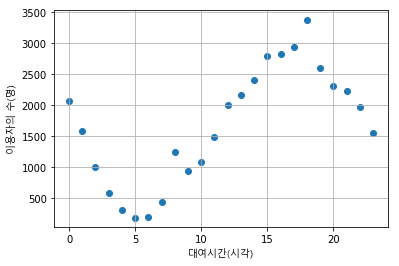

In [7]:
plt.grid()
plt.scatter(x = time.index, y = time.values) # x축이 대여시간,  y축이 대여시간 count값
plt.xlabel('대여시간(시각)', fontproperties = fontprop)
plt.ylabel('이용자의 수(명)', fontproperties = fontprop)
# 15~19시가 학생들 하교시간 + 직장인들 퇴근시간이라고 생각

In [8]:
u = One_hour[((One_hour['연령대코드']=='20대')| (One_hour['연령대코드']=='30대') | (One_hour['연령대코드']=='40대'))]

In [9]:
df = u[(u['대여시간']==15) | (u['대여시간']==16) | (u['대여시간']==17) | (u['대여시간']==18) | (u['대여시간']==19)]
df # 20~40대 중에서 대여시간이 7~9, 17~19시인 데이터 추출

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
751,2018-11-01,15,1044,굽은다리역,일일권,F,20대,1,31.24,0.32,1360,7
752,2018-11-01,15,109,제일빌딩 앞,일일권,F,20대,1,23.34,0.30,1310,13
753,2018-11-01,15,2272,교대입구 교차로,일일권,F,20대,1,44.00,0.47,2020,18
754,2018-11-01,15,301,경복궁역 7번출구 앞,일일권,F,20대,1,34.25,0.40,1730,37
755,2018-11-01,15,3513,상왕십리역 1번출구,일일권,F,20대,1,13.97,0.15,630,5
756,2018-11-01,15,1336,성북3교 위,일일권,F,20대,1,28.32,0.35,1490,11
757,2018-11-01,15,1962,가리봉동주민센터,일일권,F,20대,1,99.10,0.89,3850,33
758,2018-11-01,15,307,서울역사박물관 앞,일일권,F,20대,1,143.59,1.20,5180,46
759,2018-11-01,15,1158,가양역 8번출구,일일권,F,20대,1,0.00,0.00,0,25
760,2018-11-01,15,1160,양천향교역 7번출구앞,일일권,F,20대,1,174.14,2.22,9560,58


In [10]:
user = df['이동시간'].value_counts()

Text(0,0.5,'이용자의 수(명)')

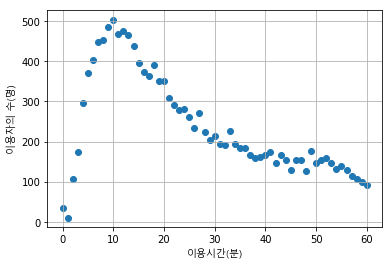

In [11]:
plt.grid()
plt.scatter(x = user.index, y = user.values) # x축이 이용시간(분),  y축이 이용시간 count값
plt.xlabel('이용시간(분)', fontproperties = fontprop)
plt.ylabel('이용자의 수(명)', fontproperties = fontprop)

In [12]:
user.values[user.values > (user.values.mean())].sum() # 이용자의 수의 평균보다 큰 값들의 합계

8722

In [14]:
sorted(user.index[user.values > (user.values.mean())],reverse = True)[0] # 이용자의 수의 평균 값보다 큰 값들의 인덱스 중 가장 높은 숫자  => 27분이 기준의 최솟값

27

27분을 반올림해서 30분을 기준으로 한 이용권을 내는 것이 어떤지 생각해봤다